In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import re
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [4]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Load HDF5 file from working directory 

In [5]:
os.chdir(r'C:\Users\Sellit\Desktop\BA_Coding\Data\1final_out')

#### DataFrame with checkout pages

In [6]:
start4=datetime.now()

df = pd.read_hdf('DataFrame_1_df_out.h5', 'df_out')

end4 = datetime.now()
print(end4 - start4)

0:00:01.935577


In [7]:
df = df.groupby('session_id').head(5)
df = df.reset_index(drop=True)

#### DataFrame without checkout pages

In [8]:
start4=datetime.now()

df_out = pd.read_hdf('DataFrame_1_five_pages_df_out.h5', 'df_out')

end4 = datetime.now()
print(end4 - start4)

0:00:00.474915


### Most common sequence of first five pages

In [9]:
df_head = df.groupby('session_id').head(1)

In [10]:
df_head[df_head['purchase']==True].groupby('first_5_pages')['session_id'].count().sort_values(ascending =False).nlargest(6)/df_head[df_head['purchase']==True].groupby('first_5_pages')['session_id'].count().sort_values(ascending =False).sum()

first_5_pages
product,checkout,checkout,checkout,checkout    0.077040
product,product,product,product,product        0.039089
product,product,checkout,checkout,checkout     0.023909
product,product,product,product,checkout       0.015939
product,product,product,checkout,checkout      0.014801
product,checkout,payment,checkout,checkout     0.014801
Name: session_id, dtype: float64

In [12]:
df_head[df_head['purchase']==False].groupby('first_5_pages')['session_id'].count().sort_values(ascending =False).nlargest(6)/df_head[df_head['purchase']==False].groupby('first_5_pages')['session_id'].count().sort_values(ascending =False).sum()

first_5_pages
cat2,cat2,cat2,cat2,cat2                   0.052491
product,product,product,product,product    0.048561
cat2,product,cat2,product,cat2             0.023439
cat2,cat2,product,cat2,cat2                0.017544
cat3,cat3,cat3,cat3,cat3                   0.017263
cat2,cat2,cat2,cat2,product                0.017263
Name: session_id, dtype: float64

### Compute how many pages per category are in one session on average

In [13]:
num_of_purch_sessions = df_out[df_out['purchase']==True]['session_id'].nunique()
num_of_purch_sessions

1427

In [14]:
num_of_nonpurch_sessions = df_out[df_out['purchase']==False]['session_id'].nunique()
num_of_nonpurch_sessions

6723

In [15]:
visits_per_cat_purch = df_out[df_out['purchase']==True]['page_cat'].value_counts() 
visits_per_cat_avg_purch = visits_per_cat_purch/num_of_purch_sessions

In [16]:
visits_per_cat_nonpurch = df_out[df_out['purchase']==False]['page_cat'].value_counts() 
visits_per_cat_avg_nonpurch = visits_per_cat_nonpurch/num_of_nonpurch_sessions

<Figure size 432x288 with 0 Axes>

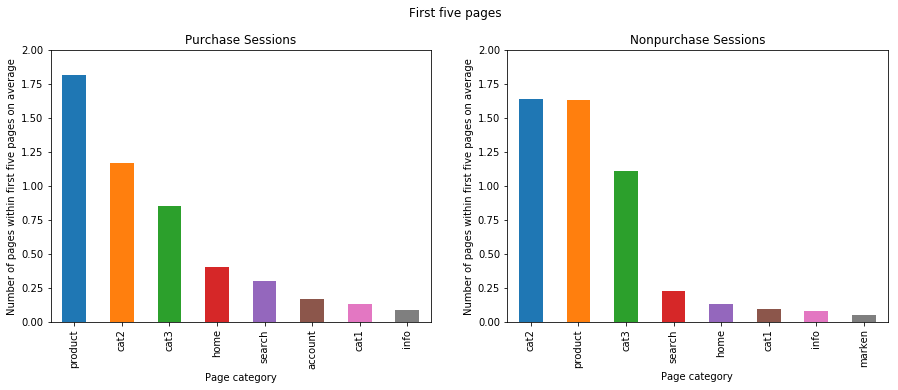

In [21]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(15,5))

plt.suptitle('First five pages', y=1.)
plt.subplot(1,2,1)
visits_per_cat_avg_purch[:8].plot(kind = 'bar')
plt.xlabel('Page category')
plt.ylabel('Number of pages within first five pages on average')
plt.title('Purchase Sessions')
plt.ylim(0,2)

plt.subplot(1,2,2)
visits_per_cat_avg_nonpurch[:8].plot(kind = 'bar')
plt.xlabel('Page category')
plt.ylabel('Number of pages within first five pages on average')
plt.title('Nonpurchase Sessions')
plt.ylim(0,2)

plt.show()

### Calculate scroll per category

In [30]:
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [65]:
scroll_per_cat_purch = df_out[df_out['purchase']==True].groupby('page_cat')['scroll'].agg(['mean', 'median'])
scroll_per_cat_nonpurch = df_out[df_out['purchase']==False].groupby('page_cat')['scroll'].agg(['mean', 'median'])

In [66]:
scroll_per_cat_purch

,mean,median
page_cat,,
account,61.263158,56.0
cat1,28.686170,28.0
cat2,45.210558,35.0
cat3,59.342084,60.0
home,24.958834,16.0
info,62.976744,61.0
marken,58.044444,59.0
not assigned,6.000000,6.0
notes,69.625000,66.0


In [67]:
scroll_per_cat_nonpurch

,mean,median
page_cat,,
account,60.979381,52.0
cat1,34.421851,32.0
cat2,46.277692,37.0
cat3,58.772873,62.0
home,27.296619,19.0
info,65.193896,66.0
marken,54.055215,54.0
notes,63.354839,61.0
product,59.177155,57.0


In [23]:
df_most_important_cats = df_out[(df_out['page_cat']=='product')|(df_out['page_cat']=='cat1')|(df_out['page_cat']=='cat2')|(df_out['page_cat']=='cat3')|(df_out['page_cat']=='info')|(df_out['page_cat']=='search')|(df_out['page_cat']=='home')]

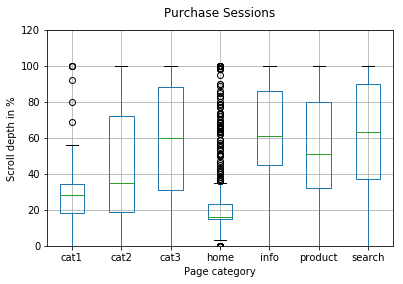

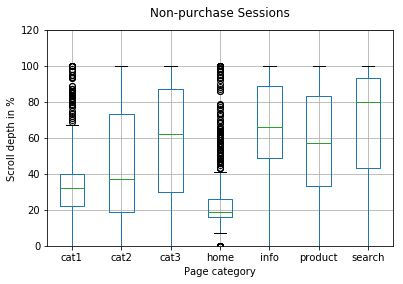

In [24]:
max_y_axis = 120

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='scroll', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Scroll depth in %')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='scroll', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Scroll depth in %')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

### Calculate duration of first 5 pages

In [26]:
df_out['visitTime_5_pages'] = df_out.groupby(['session_id'])['visitTime'].transform('sum')

In [27]:
dur_5_pages_purch = df_out[df_out['purchase']==True].groupby(['session_id']).head(1)['visitTime_5_pages']
dur_5_pages_nonpurch = df_out[df_out['purchase']==False].groupby(['session_id']).head(1)['visitTime_5_pages']

In [31]:
dur_5_pages_purch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean        558.962638
std        1064.601090
min          12.296000
q25          96.322500
median      185.038000
q75         468.697000
max       16876.129000
Name: visitTime_5_pages, dtype: float64

In [32]:
dur_5_pages_nonpurch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean        436.299637
std         929.212770
min           4.354000
q25          90.554500
median      153.862000
q75         311.286500
max       16879.361000
Name: visitTime_5_pages, dtype: float64

C:\Users\Sellit\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


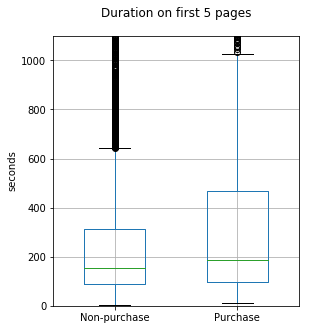

In [80]:
max_y_axis = 1100

df_out.groupby('session_id').head(1).boxplot(column='visitTime_5_pages', by='purchase', widths = 0.5)
plt.title('')
plt.xlabel('')
plt.ylabel('seconds')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Duration on first 5 pages')
plt.xticks(np.arange(1,3), ['Non-purchase', 'Purchase'])
plt.axes().set_aspect(1/500)
plt.show()

### Calculate engegamentTime on first 5 pages

In [82]:
df_out['engagementTime_5_pages'] = df_out.groupby(['session_id'])['engagementTime'].transform('sum')

In [83]:
eng_5_pages_purch = df_out[df_out['purchase']==True].groupby(['session_id']).head(1)['engagementTime_5_pages']
eng_5_pages_nonpurch = df_out[df_out['purchase']==False].groupby(['session_id']).head(1)['engagementTime_5_pages']

In [84]:
eng_5_pages_purch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean      155.426991
std       105.117768
min        11.236000
q25        81.806000
median    127.604000
q75       203.058000
max       881.085000
Name: engagementTime_5_pages, dtype: float64

In [85]:
eng_5_pages_nonpurch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       137.939942
std         85.707066
min          4.354000
q25         81.277500
median     117.918000
q75        173.279000
max       1739.654000
Name: engagementTime_5_pages, dtype: float64

C:\Users\Sellit\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


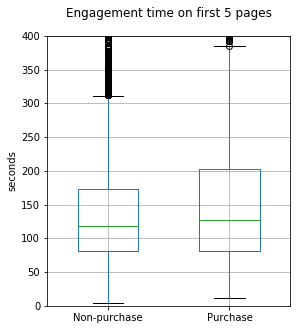

In [89]:
max_y_axis = 400

df_out.groupby('session_id').head(1).boxplot(column='engagementTime_5_pages', by='purchase', widths = 0.5)
plt.title('')
plt.xlabel('')
plt.ylabel('seconds')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Engagement time on first 5 pages')
plt.xticks(np.arange(1,3), ['Non-purchase', 'Purchase'])
plt.axes().set_aspect(1/180)
plt.show()

### Calculate time per category

In [83]:
time_per_cat_purch = df_out[df_out['purchase']==True].groupby('page_cat')[['engagementTime', 'visitTime']].agg(['mean', 'median'])
time_per_cat_nonpurch = df_out[df_out['purchase']==False].groupby('page_cat')[['engagementTime', 'visitTime']].agg(['mean', 'median'])

In [84]:
time_per_cat_purch

engagementTime            visitTime        
                       mean   median        mean  median
page_cat                                                
account           20.683478  12.0070   43.971146  12.359
cat1               7.307484   5.2460   19.121096   4.745
cat2              22.429101  14.6690   53.174226  14.814
cat3              26.120467  18.5410   61.316837  18.576
home              12.595607   8.7950   49.045578   9.128
info              27.819380  14.2680   97.967868  16.158
marken            23.528178  21.2400  102.927889  21.530
not assigned       3.147000   3.1470    3.147000   3.147
notes             12.971875   6.7800   19.601875   6.812
product           47.795357  29.7370  211.071682  39.616
register           1.325000   1.3250    1.325000   1.325
search            22.410113  15.7195   59.035948  16.544

In [85]:
time_per_cat_nonpurch

engagementTime            visitTime         
                   mean   median        mean   median
page_cat                                             
account       20.698340  12.8260   35.243330  13.1760
cat1           8.491354   6.0190   16.981223   5.9540
cat2          21.796183  14.8870   48.346798  15.1480
cat3          24.591558  18.3870   53.089033  18.7245
home          12.163316   8.2180   38.087129   8.2900
info          32.888878  15.5070   84.949241  17.7040
marken        29.768936  16.3820   46.618736  17.6270
notes         11.068387   7.4840   15.278065   8.0000
product       37.967147  25.7165  164.420296  33.6290
search        25.214266  19.4220   54.098720  20.0620

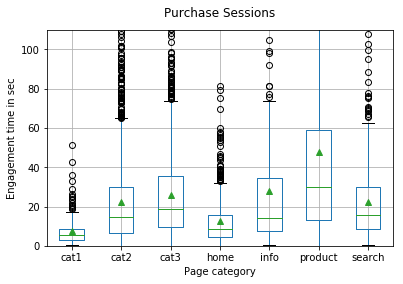

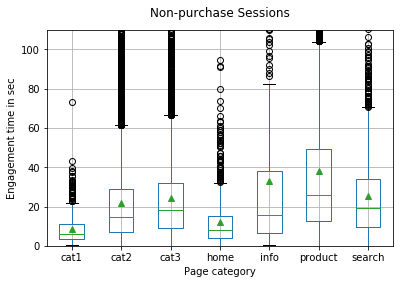

In [96]:
max_y_axis = 110

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='engagementTime', by='page_cat', showmeans = True)
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Engagement time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='engagementTime', by='page_cat', showmeans = True)
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Engagement time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

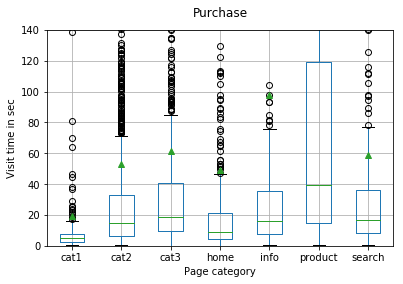

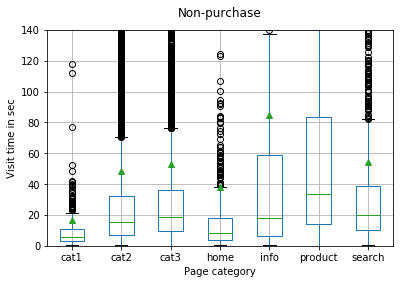

In [94]:
max_y_axis = 140

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='visitTime', by='page_cat', showmeans = True)
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Visit time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='visitTime', by='page_cat', showmeans = True)
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Visit time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase')
plt.show()

### Time with no movement, Mean velocity, Distance on page per category

#### Time with no movement

In [99]:
# Purchase

df_most_important_cats[df_most_important_cats['purchase']==True].groupby(['page_cat'])['time_no_movement'].agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

,mean,std,min,q25,median,q75,max
page_cat,,,,,,,
cat1,14.826935,84.045741,0.007,0.81375,1.6575,3.46375,861.730
cat2,31.792618,148.386381,0.000,1.42025,4.6895,15.43175,2219.565
cat3,34.694015,144.522304,0.000,1.92850,6.2295,18.03525,2198.949
home,11.959196,51.524251,0.000,0.90675,2.6490,7.33225,831.849
info,60.230226,223.757788,0.000,0.77500,6.4980,21.74500,1744.965
product,133.953770,476.431885,0.000,5.49800,19.3260,70.26800,16727.307
search,33.247919,151.204226,0.000,1.19725,4.3430,18.12825,1635.667


In [100]:
# Non-purchase

df_most_important_cats[df_most_important_cats['purchase']==False].groupby(['page_cat'])['time_no_movement'].agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

,mean,std,min,q25,median,q75,max
page_cat,,,,,,,
cat1,7.761720,69.839858,0.0,0.95500,2.085,4.6970,1644.604
cat2,22.225532,101.128913,0.0,1.63400,5.157,14.5515,3512.488
cat3,24.876287,105.116699,0.0,2.07400,6.469,16.5470,2988.144
home,21.318348,132.051361,0.0,1.05525,2.835,8.1010,1976.241
info,42.817132,148.406905,0.0,1.58200,7.476,32.7745,2192.546
product,72.707918,226.199452,0.0,4.50400,15.205,45.9280,3401.362
search,25.331236,85.683344,0.0,1.71550,6.142,19.8135,1861.802


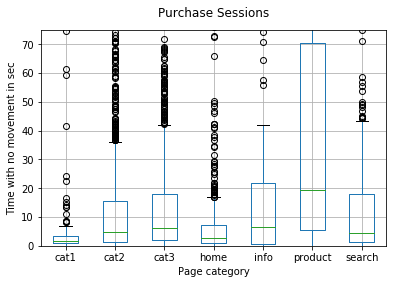

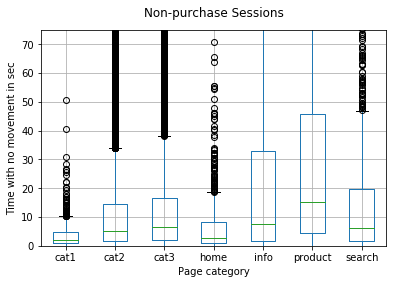

In [104]:
max_y_axis = 75

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='time_no_movement', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Time with no movement in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='time_no_movement', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Time with no movement in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

#### Mean velocity

In [89]:
# Purchase

df_most_important_cats[df_most_important_cats['purchase']==True].groupby(['page_cat'])['mean_velocity'].agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

,mean,std,min,q25,median,q75,max
page_cat,,,,,,,
cat1,151.990849,139.971431,0.0,51.590809,113.803371,206.801030,656.206808
cat2,227.788824,193.480336,0.0,94.585829,179.416428,304.992128,2102.592744
cat3,224.770558,178.777653,0.0,104.634952,184.779959,300.265696,1368.237907
home,197.260776,183.526161,0.0,64.885878,145.371726,270.033297,1125.151794
info,169.287498,112.794393,0.0,92.184484,149.595186,238.909359,478.506052
product,160.169773,155.412047,0.0,56.281751,123.047979,213.109365,1745.395450
search,228.511362,198.484587,0.0,89.172372,172.780966,307.914137,1429.368353


In [90]:
# Non-purchase

df_most_important_cats[df_most_important_cats['purchase']==False].groupby(['page_cat'])['mean_velocity'].agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

,mean,std,min,q25,median,q75,max
page_cat,,,,,,,
cat1,188.003416,165.531954,0.0,77.078472,149.102813,256.896600,1167.035712
cat2,211.949510,169.110041,0.0,94.184463,171.287288,282.878552,1503.385907
cat3,212.926065,168.381070,0.0,102.014784,174.124568,278.848906,2900.533110
home,194.926908,180.839212,0.0,77.196397,147.153996,261.079509,1367.696478
info,197.811769,166.679108,0.0,79.544045,154.476112,269.200293,1176.253136
product,175.712852,146.427194,0.0,75.677580,141.998706,236.125758,1695.213571
search,232.443682,198.830074,0.0,101.102250,187.198110,309.463376,3084.743636


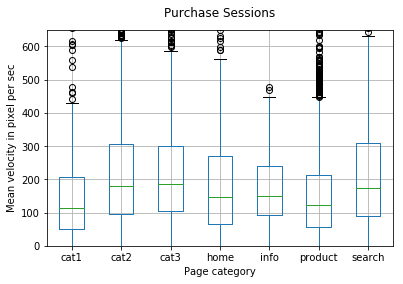

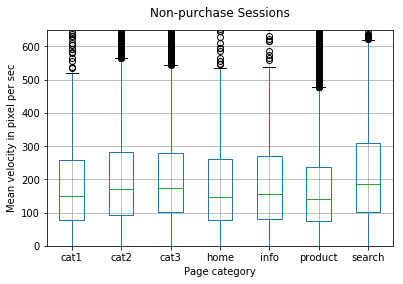

In [106]:
max_y_axis = 650

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='mean_velocity', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Mean velocity in pixel per sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='mean_velocity', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Mean velocity in pixel per sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

#### Distance on page

In [92]:
# Purchase

df_most_important_cats[df_most_important_cats['purchase']==True].groupby(['page_cat'])['dist_on_page'].agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

,mean,std,min,q25,median,q75,max
page_cat,,,,,,,
cat1,1166.567210,1753.321528,0.0,208.988907,552.056399,1477.242758,14972.012128
cat2,4347.497940,4568.249258,0.0,1166.622505,3250.930569,5876.615446,46580.596164
cat3,4951.470166,4514.529624,0.0,1844.458874,3867.263297,6433.101887,37628.249834
home,2689.153250,3875.706433,0.0,561.051166,1244.380583,3211.164382,31903.300867
info,4291.432703,5240.657915,0.0,1102.750498,2593.347473,5534.613528,42501.502789
product,8571.213000,11267.468432,0.0,2267.542477,4992.398366,10387.513689,119258.367311
search,4066.441183,3895.111161,0.0,1384.557594,3227.724663,5167.397773,40340.169681


In [91]:
# Non-purchase

df_most_important_cats[df_most_important_cats['purchase']==False].groupby(['page_cat'])['dist_on_page'].agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

,mean,std,min,q25,median,q75,max
page_cat,,,,,,,
cat1,1581.752353,1912.477879,0.0,336.173202,935.416100,2069.120931,20122.691724
cat2,4194.792259,4583.309700,0.0,1162.297299,3116.789865,5470.268828,91481.003573
cat3,4653.785247,4408.846515,0.0,1772.305407,3627.081873,6008.227772,57970.634530
home,2599.690374,3849.599528,0.0,560.056283,1302.228901,3030.915418,46660.304580
info,5636.020066,7995.525534,0.0,1339.064223,2974.015282,6670.339115,75345.704739
product,7133.308081,8188.615019,0.0,2371.632232,4782.795419,9012.406804,173100.839438
search,4958.964655,4196.849391,0.0,1981.019261,3987.259731,6510.586614,30875.079281


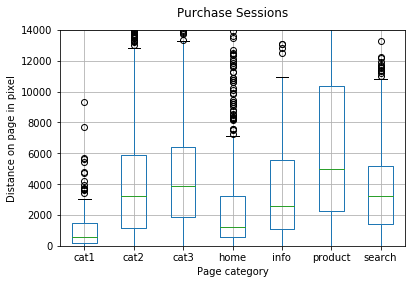

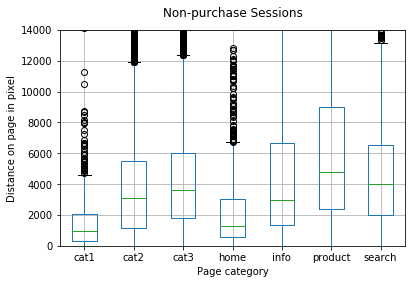

In [109]:
max_y_axis = 14000

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='dist_on_page', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Distance on page in pixel')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='dist_on_page', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Distance on page in pixel')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

### Time on object aggregated

In [114]:
list_columns = ['ta_area_map_Advisor_time_on_oject_aggregated',
'ta_area_map_Filter_time_on_oject_aggregated',
'ta_area_map_Products_time_on_oject_aggregated',
'ta_area_map_Picture_main_time_on_oject_aggregated',
'ta_area_map_ProductDescription_time_on_oject_aggregated',
'ta_area_map_ProductDetails_Right_time_on_oject_aggregated',
'ta_area_map_Quantity_time_on_oject_aggregated',
'ta_area_map_AreaCalculation_time_on_oject_aggregated',
'ta_area_map_In den Warenkorb_time_on_oject_aggregated']

In [124]:
df_out_head = df_out.groupby('session_id').head(1)

In [125]:
df_out_head[list_columns] = df_out_head[list_columns]/1000

C:\Users\Sellit\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [126]:
df_out_head[df_out_head['purchase']==True][list_columns].agg([np.mean])

,ta_area_map_Advisor_time_on_oject_aggregated,ta_area_map_Filter_time_on_oject_aggregated,ta_area_map_Products_time_on_oject_aggregated,ta_area_map_Picture_main_time_on_oject_aggregated,ta_area_map_ProductDescription_time_on_oject_aggregated,ta_area_map_ProductDetails_Right_time_on_oject_aggregated,ta_area_map_Quantity_time_on_oject_aggregated,ta_area_map_AreaCalculation_time_on_oject_aggregated,ta_area_map_In den Warenkorb_time_on_oject_aggregated
mean,0.310345,4.438561,7.965816,3.194892,5.105896,3.147961,0.776512,0.536085,0.972678


In [127]:
df_out_head[df_out_head['purchase']==False][list_columns].agg([np.mean])

,ta_area_map_Advisor_time_on_oject_aggregated,ta_area_map_Filter_time_on_oject_aggregated,ta_area_map_Products_time_on_oject_aggregated,ta_area_map_Picture_main_time_on_oject_aggregated,ta_area_map_ProductDescription_time_on_oject_aggregated,ta_area_map_ProductDetails_Right_time_on_oject_aggregated,ta_area_map_Quantity_time_on_oject_aggregated,ta_area_map_AreaCalculation_time_on_oject_aggregated,ta_area_map_In den Warenkorb_time_on_oject_aggregated
mean,0.779097,6.331126,10.073777,2.118169,4.67283,2.690519,0.304969,0.136871,0.232896


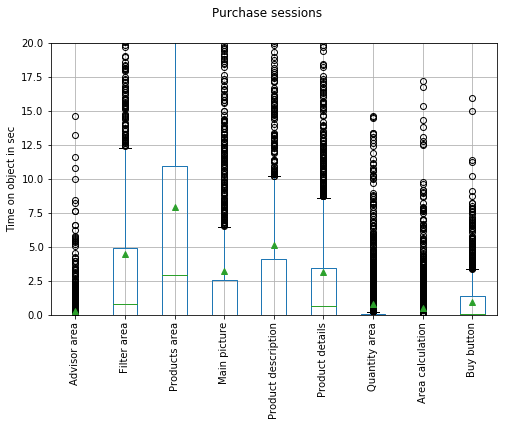

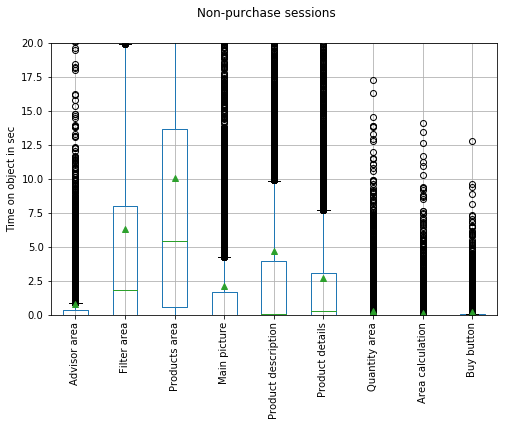

In [130]:
max_y_axis = 20

df_out_head[df_out_head['purchase']==True][list_columns].boxplot(showmeans = True)
plt.title('')
plt.xlabel('')
plt.ylabel('Time on object in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Purchase sessions')
plt.xticks(np.arange(1,10), ['Advisor area', 'Filter area', 'Products area', 'Main picture', 'Product description', 'Product details', 'Quantity area', 'Area calculation', 'Buy button'], rotation='vertical')
plt.show()

df_out_head[df_out_head['purchase']==False][list_columns].boxplot(showmeans = True)
plt.title('')
plt.xlabel('')
plt.ylabel('Time on object in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Non-purchase sessions')
plt.xticks(np.arange(1,10), ['Advisor area', 'Filter area', 'Products area', 'Main picture', 'Product description', 'Product details', 'Quantity area', 'Area calculation', 'Buy button'], rotation='vertical')
plt.show()